x_train:  (50000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)
iteration 0 / 300: loss 0.999971
iteration 1 / 300: loss 0.960034
iteration 2 / 300: loss 0.941739
iteration 3 / 300: loss 0.928193
iteration 4 / 300: loss 0.917165
iteration 5 / 300: loss 0.907849
iteration 6 / 300: loss 0.898672
iteration 7 / 300: loss 0.891810
iteration 8 / 300: loss 0.886345
iteration 9 / 300: loss 0.879006
iteration 10 / 300: loss 0.873583
iteration 11 / 300: loss 0.869286
iteration 12 / 300: loss 0.864722
iteration 13 / 300: loss 0.861121
iteration 14 / 300: loss 0.854917
iteration 15 / 300: loss 0.851334
iteration 16 / 300: loss 0.847153
iteration 17 / 300: loss 0.843855
iteration 18 / 300: loss 0.840252
iteration 19 / 300: loss 0.838141
iteration 20 / 300: loss 0.834823
iteration 21 / 300: loss 0.832414
iteration 22 / 300: loss 0.830949
iteration 23 / 300: loss 0.827404
iteration 24 / 300: loss 0.825975
iteration 25 / 300: loss 0.823708
iteration 26 / 300: loss 0.821816
iteration 27 / 300: loss 0.818795
iter

iteration 236 / 300: loss 0.782624
iteration 237 / 300: loss 0.783086
iteration 238 / 300: loss 0.783141
iteration 239 / 300: loss 0.782822
iteration 240 / 300: loss 0.782461
iteration 241 / 300: loss 0.782924
iteration 242 / 300: loss 0.781495
iteration 243 / 300: loss 0.782036
iteration 244 / 300: loss 0.781663
iteration 245 / 300: loss 0.782714
iteration 246 / 300: loss 0.784458
iteration 247 / 300: loss 0.783363
iteration 248 / 300: loss 0.781825
iteration 249 / 300: loss 0.784151
iteration 250 / 300: loss 0.781103
iteration 251 / 300: loss 0.781729
iteration 252 / 300: loss 0.782069
iteration 253 / 300: loss 0.782892
iteration 254 / 300: loss 0.781987
iteration 255 / 300: loss 0.782197
iteration 256 / 300: loss 0.782346
iteration 257 / 300: loss 0.782786
iteration 258 / 300: loss 0.782751
iteration 259 / 300: loss 0.780619
iteration 260 / 300: loss 0.784580
iteration 261 / 300: loss 0.780445
iteration 262 / 300: loss 0.780613
iteration 263 / 300: loss 0.783769
iteration 264 / 300:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

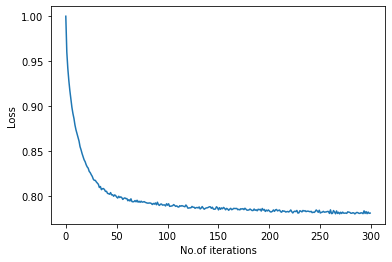

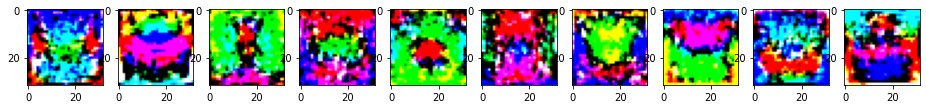

x_train-> (50000, 3072)
train_acc = 0.7560644444444444
train_loss = 0.7809448887589691
x_test-> (10000, 3072)
test_acc = 0.749
test_loss = 0.7867270854419913


In [35]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data() 
print('x_train: ', x_train.shape)
K = len(np.unique(y_train))# Classes

Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10

x_train, x_test = x_train / 255.0, x_test / 255.0     #normalize pixel values
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)

batch_size = Ntr
iterations =300                 #no.of iterations
lr =1.8e-2                      #initial learning rate
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0

for t in range(iterations):
    batch_indices=np.random.choice(Ntr,batch_size)
    x=x_train[batch_indices]
    y=y_train[batch_indices]
    y_pred=x.dot(w1)+b1                   
    loss = 1./batch_size*np.square(y_pred - y).sum() + reg *(np.sum(w1*w1))     
    loss_history.append(loss)
    print('iteration %d / %d: loss %f'%(t,iterations,loss))
    
    dy_pred=1./batch_size*2.0*(y_pred-y)     #partial derivative of L w.r.t y_pred     
    dw1=x.T.dot(dy_pred)+reg*w1              #partial derivatve of L w.r.t w1
    db1=dy_pred.sum(axis=0)                  #partial derivative of L w.r.t b1
    w1-=lr*dw1
    b1-=lr*db1
    lr*=lr_decay

plt.plot(loss_history)
plt.xlabel("No.of iterations")
plt.ylabel("Loss")
f,axarr=plt.subplots(1,10)
f.set_size_inches(16,6)

for i in range(10):
    img=w1[:,i].reshape(32,32,3)
    axarr[i].imshow(img*1000)
plt.show()

x_t=x_train
y_pred=x_t.dot(w1)+b1
train_acc=1.0 - 1/(9*Ntr)*(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1))).sum()
train_loss=1./Ntr*np.square(y_pred - y_train).sum() + reg *(np.sum(w1*w1))

x_t=x_test
y_pred=x_t.dot(w1)+b1
test_acc=1.0 - 1/(9*Nte)*(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred,axis=1))).sum()
test_loss=1./Nte*np.square(y_pred - y_test).sum() + reg *(np.sum(w1*w1))

print("x_train->",x_t.shape)
print('train_acc =',train_acc)
print('train_loss =',train_loss)

print("x_test->",x_t.shape)
print('test_acc =',test_acc)
print('test_loss =',test_loss)

x_train:  (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
iteration 0 / 300: loss 1.000028
iteration 1 / 300: loss 0.928140
iteration 2 / 300: loss 0.908441
iteration 3 / 300: loss 0.930184
iteration 4 / 300: loss 0.974258
iteration 5 / 300: loss 1.048678
iteration 6 / 300: loss 1.175423
iteration 7 / 300: loss 1.265983
iteration 8 / 300: loss 1.086929
iteration 9 / 300: loss 0.938693
iteration 10 / 300: loss 0.889442
iteration 11 / 300: loss 0.873792
iteration 12 / 300: loss 0.866937
iteration 13 / 300: loss 0.863229
iteration 14 / 300: loss 0.862408
iteration 15 / 300: loss 0.862123
iteration 16 / 300: loss 0.861656
iteration 17 / 300: loss 0.857276
iteration 18 / 300: loss 0.852871
iteration 19 / 300: loss 0.850575
iteration 20 / 300: loss 0.850588
iteration 21 / 300: loss 0.847768
iteration 22 / 300: loss 0.845563
iteration 23 / 300: loss 0.844052
iteration 24 / 300: loss 0.845427
iteration 25 / 300: loss 0.843595
iteration 26 / 300: loss 0.842011
iteration 27

iteration 235 / 300: loss 0.743281
iteration 236 / 300: loss 0.745880
iteration 237 / 300: loss 0.750618
iteration 238 / 300: loss 0.758366
iteration 239 / 300: loss 0.755155
iteration 240 / 300: loss 0.752341
iteration 241 / 300: loss 0.748995
iteration 242 / 300: loss 0.750505
iteration 243 / 300: loss 0.745256
iteration 244 / 300: loss 0.746145
iteration 245 / 300: loss 0.743084
iteration 246 / 300: loss 0.747000
iteration 247 / 300: loss 0.743868
iteration 248 / 300: loss 0.747407
iteration 249 / 300: loss 0.749397
iteration 250 / 300: loss 0.747502
iteration 251 / 300: loss 0.747033
iteration 252 / 300: loss 0.745701
iteration 253 / 300: loss 0.749842
iteration 254 / 300: loss 0.752386
iteration 255 / 300: loss 0.751923
iteration 256 / 300: loss 0.749423
iteration 257 / 300: loss 0.748381
iteration 258 / 300: loss 0.747784
iteration 259 / 300: loss 0.751732
iteration 260 / 300: loss 0.750089
iteration 261 / 300: loss 0.748269
iteration 262 / 300: loss 0.742102
iteration 263 / 300:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

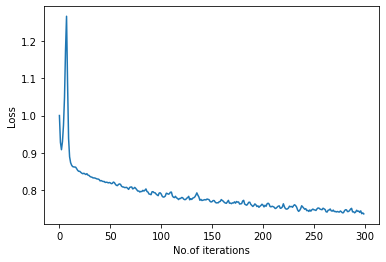

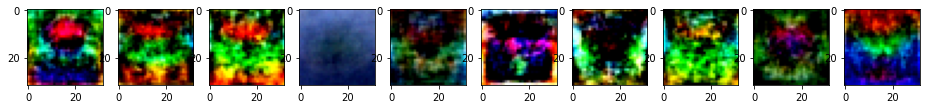

x_train-> (10000, 3072)
train_acc = 0.7755577777777778
train_loss = 0.7386732453059858
x_test-> (10000, 3072)
test_acc = 0.7636666666666667
test_loss = 0.760596695560745


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

K = len(np.unique(y_train))# Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10

mean_image = np.mean(x_train, axis=0)

x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

H=200                                      #No.of hidden layers
std=1e-5
w1 = std*np.random.randn(Din, H)
w2=std*np.random.randn(H,K)
b1 = np.zeros(H)
b2=np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)

batch_size = Ntr
iterations =300                  #No. of iterations
lr =1.5e-2                       #Initial learning rate
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0

for t in range(iterations):
    batch_indices=np.random.choice(Ntr,batch_size)
    x=x_train[batch_indices]
    y=y_train[batch_indices]
    h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))             #sigmoid function
    y_pred=h.dot(w2)+b2
    loss=1./batch_size*np.square(y_pred-y).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))
    loss_history.append(loss)
    print('iteration %d / %d: loss %f'%(t,iterations,loss))
    
    dy_pred=1./batch_size*2.0*(y_pred-y)          #derivative of L w.r.t y_pred
    dw2=h.T.dot(dy_pred)+reg*w2                   
    db2=dy_pred.sum(axis=0)                      
    dh=dy_pred.dot(w2.T)                          
    dw1=x.T.dot(dh*h*(1-h))+reg*w1                
    db1=(dh*h*(1-h)).sum(axis=0)
    w1-=lr*dw1
    w2-=lr*dw2
    b1-=lr*db1
    b2-=lr*db2
    lr*=lr_decay
    
plt.plot(loss_history)
plt.xlabel("No.of iterations")
plt.ylabel("Loss")
f,axarr=plt.subplots(1,10)
f.set_size_inches(16,6)

for i in range(10):
    img=w1[:,i].reshape(32,32,3)
    axarr[i].imshow(img*1000)
plt.show()

x_t=x_train
h=1.0/(1.0+np.exp(-(x_t.dot(w1)+b1)))
y_pred=h.dot(w2)+b2
train_acc=1.0 - 1/(9*Ntr)*(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1))).sum()
train_loss=1./Ntr*np.square(y_pred-y_train).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))

x_t=x_test
h=1.0/(1.0+np.exp(-(x_t.dot(w1)+b1)))
y_pred=h.dot(w2)+b2
test_acc=1.0 -1/(9*Nte)*(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred,axis=1))).sum()
test_loss=1./Nte*np.square(y_pred-y_test).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))

print("x_train->",x_t.shape)
print('train_acc =',train_acc)
print('train_loss =',train_loss)
print("x_test->",x_t.shape)
print('test_acc =',test_acc)
print('test_loss =',test_loss)

x_train:  (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
iteration 0 / 300: loss 0.787471
iteration 1 / 300: loss 0.763789
iteration 2 / 300: loss 0.750251
iteration 3 / 300: loss 0.737931
iteration 4 / 300: loss 0.724499
iteration 5 / 300: loss 0.713939
iteration 6 / 300: loss 0.705116
iteration 7 / 300: loss 0.697696
iteration 8 / 300: loss 0.690901
iteration 9 / 300: loss 0.679816
iteration 10 / 300: loss 0.672261
iteration 11 / 300: loss 0.665743
iteration 12 / 300: loss 0.658483
iteration 13 / 300: loss 0.652392
iteration 14 / 300: loss 0.647334
iteration 15 / 300: loss 0.642790
iteration 16 / 300: loss 0.638045
iteration 17 / 300: loss 0.634557
iteration 18 / 300: loss 0.631737
iteration 19 / 300: loss 0.628846
iteration 20 / 300: loss 0.625896
iteration 21 / 300: loss 0.623106
iteration 22 / 300: loss 0.620594
iteration 23 / 300: loss 0.618257
iteration 24 / 300: loss 0.616116
iteration 25 / 300: loss 0.614125
iteration 26 / 300: loss 0.612143
iteration 27

iteration 235 / 300: loss 0.594056
iteration 236 / 300: loss 0.594056
iteration 237 / 300: loss 0.594056
iteration 238 / 300: loss 0.594056
iteration 239 / 300: loss 0.594056
iteration 240 / 300: loss 0.594056
iteration 241 / 300: loss 0.594056
iteration 242 / 300: loss 0.594056
iteration 243 / 300: loss 0.594056
iteration 244 / 300: loss 0.594056
iteration 245 / 300: loss 0.594056
iteration 246 / 300: loss 0.594056
iteration 247 / 300: loss 0.594056
iteration 248 / 300: loss 0.594056
iteration 249 / 300: loss 0.594056
iteration 250 / 300: loss 0.594056
iteration 251 / 300: loss 0.594056
iteration 252 / 300: loss 0.594056
iteration 253 / 300: loss 0.594056
iteration 254 / 300: loss 0.594056
iteration 255 / 300: loss 0.594056
iteration 256 / 300: loss 0.594056
iteration 257 / 300: loss 0.594056
iteration 258 / 300: loss 0.594056
iteration 259 / 300: loss 0.594056
iteration 260 / 300: loss 0.594056
iteration 261 / 300: loss 0.594056
iteration 262 / 300: loss 0.594056
iteration 263 / 300:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

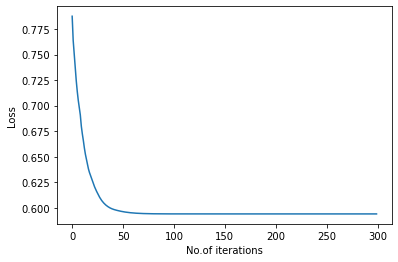

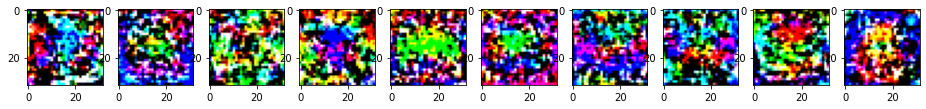

x_train-> (10000, 3072)
train_acc = 0.8624288888888889
train_loss = 0.5966890039883246
x_test-> (10000, 3072)
test_acc = 0.7778555555555555
test_loss = 0.7436201209993112


In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

K = len(np.unique(y_train))# Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10

mean_image = np.mean(x_train, axis=0)

x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

H=200
std=1e-5
w1 = std*np.random.randn(Din, H)
w2=std*np.random.randn(H,K)
b1 = np.zeros(H)
b2=np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)

batch_size = 500
iterations =300
lr =1.5e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
No_of_groups =int(Ntr/batch_size)

for t in range(iterations):
    indices=np.arange(Ntr)
    indices=np.split(indices, No_of_groups)
    for batch_indices in indices:
        rng.shuffle(batch_indices)
        x=x_train[batch_indices]
        y=y_train[batch_indices]
        h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
        y_pred=h.dot(w2)+b2
        loss=1./batch_size*np.square(y_pred-y).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))
        
        dy_pred=1./batch_size*2.0*(y_pred-y)
        dw2=h.T.dot(dy_pred)+reg*w2
        db2=dy_pred.sum(axis=0)
        dh=dy_pred.dot(w2.T)
        dw1=x.T.dot(dh*h*(1-h))+reg*w1
        db1=(dh*h*(1-h)).sum(axis=0)
        w1-=lr*dw1
        w2-=lr*dw2
        b1-=lr*db1
        b2-=lr*db2
        lr*=lr_decay
    loss_history.append(loss)
    print('iteration %d / %d: loss %f'%(t,iterations,loss))

plt.plot(loss_history)
plt.xlabel("No.of iterations")
plt.ylabel("Loss")
f,axarr=plt.subplots(1,10)
f.set_size_inches(16,6)

for i in range(10):
    img=w1[:,i].reshape(32,32,3)
    axarr[i].imshow(img*1000)
plt.show()

x_t=x_train
h=1.0/(1.0+np.exp(-(x_t.dot(w1)+b1)))
y_pred=h.dot(w2)+b2
train_acc=1.0 - 1/(9*Ntr)*(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1))).sum()
train_loss=1./Ntr*np.square(y_pred-y_train).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))

x_t=x_test
h=1.0/(1.0+np.exp(-(x_t.dot(w1)+b1)))
y_pred=h.dot(w2)+b2
test_acc=1.0-1/(9*Nte)*(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred,axis=1))).sum()
test_loss=1./Nte*np.square(y_pred-y_test).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))


print("x_train->",x_t.shape)
print('train_acc =',train_acc)
print('train_loss =',train_loss)
print("x_test->",x_t.shape)
print('test_acc =',test_acc)
print('test_loss =',test_loss)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

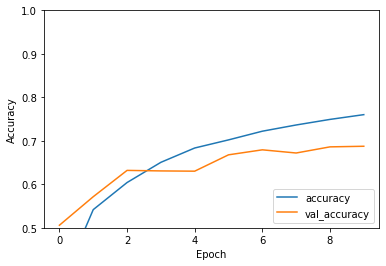

In [38]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
#from tensorflow import keras
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype = "float32")

y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype = "float32")

opt = tf.keras.optimizers.SGD(learning_rate=1.4e-2, momentum=0.9)
model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train, y_train_categorical, epochs=10,batch_size=50,
                   validation_data=(x_test, y_test_categorical))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test, y_test_categorical, verbose=2)
train_loss, train_acc = model.evaluate(x_train, y_train_categorical, verbose=2)

print("test_loss=",test_loss)
print("test_acc=",test_acc)
print("train_loss=",train_loss)
print("train_acc=",train_acc)